In [21]:
import random

class FairRoulette(object):
    def __init__(self):
        self.pockets = list(range(1,37))
        self.ball = None
        self.blackOdds, self.redOdds = 1.0, 1.0
        self.pocketOdds = len(self.pockets) - 1
        
    def spin(self):
        self.ball = random.choice(self.pockets)
    
    def isBlack(self):
        if (self.ball > 0 and self.ball <= 10) or (self.ball > 18 and self.ball <= 28):
            return self.ball % 2 == 0
        else:
            return self.ball % 2 == 1
    
    def isRed(self):
        return not self.isBlack()
    
    def betBlack(self, amount):
        if self.isBlack():
            return amount * self.blackOdds
        else:
            return - amount # * self.blackOdds
        
    def betRed(self, amount):
        if self.isRed():
            return amount * self.redOdds
        else:
            return - amount # * self.redOdds
    
    def betPocket(self, pocket, amount):
        if str(pocket) == str(self.ball):
            return amount * self.pocketOdds
        else:
            return - amount
    
    def __str__(self):
        return "Fair Roulette    "
    
class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append(0)
    def __str__(self):
        return "European Roulette"

class USARoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append(0)
        self.pockets.append(0)
    def __str__(self):
        return "American Roulette"

def play(game, spins, toPrint=False):
    bet = 1
    totRed, totBlack, totPocket = 0,0,0
    pockets = list(range(1,37))
    game = game()
    for i in range(spins):
        game.spin()
        lucky = random.choice(pockets)
        totRed += game.betRed(bet)
        totBlack += game.betBlack(bet)
        totPocket += game.betPocket(lucky, bet)
    if toPrint:
        print(spins, "spins of", game)
        print("   Expected return of betting red         =", str(round(100*totRed/spins, 8)) + "%")
        print("   Expected return of betting black       =", str(round(100*totBlack/spins, 8)) + "%")
        print("   Expected return of betting on a number =", str(round(100*totPocket/spins, 8)) + "%")
    return totRed/spins, totBlack/spins, totPocket/spins

def findPocketReturn(game, trials, spins, toPrint=False):
    pocketReturns = []
    for trial in range(trials):
        results = play(game, spins, toPrint)
        pocketReturns.append(results[2])
    return pocketReturns

def runSim(games, trials, spinRange, toPrint=False):
    results = {}
    for game in games:
        results[game().__str__()] = []
    for spins in spinRange:
        print("\nSimulating betting on pockets on", str(trials) + ",", str(spins), "spins each.")
        for game in games:
            returns = findPocketReturn(game, trials, spins)
            mean, std = meanAndStdDev(returns)
            results[game().__str__()].append((spins, 100*mean, 100*std))
            mean = str(round(100*mean, 3)) + "%"
            confidence = "+/- " + str(round(100*1.96*std, 3)) + "% with 95% confidence"
            print("   Exp. result for", game().__str__(), "=", mean, confidence)
    return results
        
def meanAndStdDev(sample):
    mean = sum(sample)/len(sample)
    tot = 0.0
    for x in sample:
        tot += (x - mean)**2
    std = (tot/len(sample))**0.5
    return mean, std

Simulating Fair Roulette    


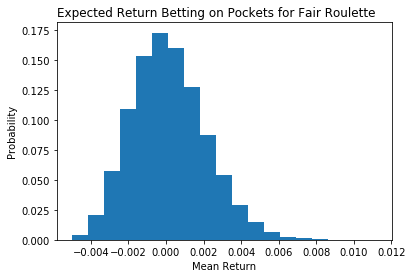

Simulating European Roulette


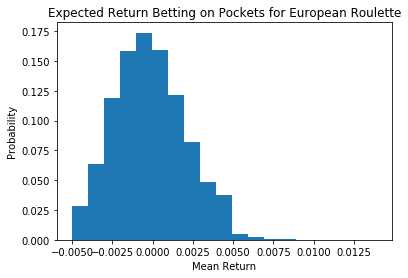

Simulating American Roulette


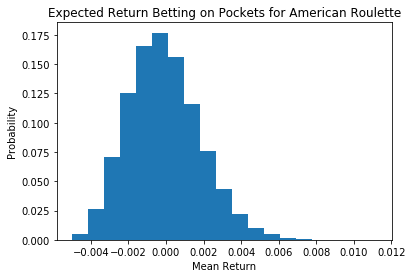

In [29]:
import pylab

trials = 50000*2
spins = 200
games = [FairRoulette, EuRoulette, USARoulette]

def plotCTL(games, trials, spins):
    for game in games:
        print("Simulating " + game().__str__())
        means = []
        for i in range(trials):
            means.append(findPocketReturn(game, 1, spins)[0]/spins)
        weights = pylab.array(len(means)*[1])/len(means)
#         pylab.figure()
        pylab.hist(means, bins=19, weights=weights)
        pylab.title("Expected Return Betting on Pockets for " + game().__str__())
        pylab.xlabel("Mean Return")
        pylab.ylabel("Probability")
        pylab.show()

plotCTL(games, trials, spins)